In [0]:
import chess
import chess.pgn
import tensorflow as tf
import os

In [0]:
with tf.Session() as sess:
    print(tf.test.is_gpu_available())
    devices = sess.list_devices()
for i in devices:
  print(i)

True
_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 9444190845632196432)
_DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 10595428959498325314)
_DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 5101285059043251182)
_DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 14800692839, 17224502834037222807)


In [0]:
p = chess.Board()
print(p)
print(*p.legal_moves)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
g1h3 g1f3 b1c3 b1a3 h2h3 g2g3 f2f3 e2e3 d2d3 c2c3 b2b3 a2a3 h2h4 g2g4 f2f4 e2e4 d2d4 c2c4 b2b4 a2a4


In [0]:
p.push_san('e4')
print(p)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


In [0]:
import torch.nn as nn
import torch.nn.functional as F


class NetModel(nn.Module):
  def __init__(self):
    super(NetModel,self).__init__()
    self.conv1 = nn.Conv2d(1,20,kernel_size=3,padding=1)
    self.conv2 = nn.Conv2d(20,40,kernel_size=3,padding=1)
    self.conv3 = nn.Conv2d(40,60,kernel_size=3,padding=1)
    self.dropout1 = nn.Dropout2d()
    
    self.conv4 = nn.Conv2d(60,60,kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(60,60,kernel_size=3,padding=1)
    self.conv6 = nn.Conv2d(60,60,kernel_size=3,padding=1)
    self.dropout2 = nn.Dropout2d()
    
    self.linear1 = nn.Linear(60*8*8,512)
    self.linear2 = nn.Linear(512,1)
    self.linear3 = nn.Linear(6400,1)
    self.tanh = nn.Tanh()
    
  def forward(self,x):

    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x),2)
    x = self.dropout1(x)
    

    x = F.relu(self.conv4(x))
    x = F.relu(self.conv5(x))
    x = F.relu(self.conv6(x))
    self.dropout2(x)
    #print('before reshaping',x.shape)
    x = x.view(-1,8*8*60)
    #print('after reshaping',x.shape)
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    #print(x.shape)
    
    return self.tanh(x)

In [0]:
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
from torch import optim
import torch


class chessData(Dataset):
  def __init__(self,X,Y):
    self.X=torch.from_numpy(X)
    self.Y=torch.from_numpy(Y)
    self.length = Y.shape[0]
  def __getitem__(self,index):
    return self.X[index],self.Y[index]
  
  def __len__(self):
    return self.length
  
  
  

In [0]:
import chess
import numpy as np
class State:
  def __init__(self,board=None):
    if board ==None:
      self.board = chess.Board()
    else:
      self.board = board
  def serialize(self):
    assert self.board.is_valid()
    state = np.zeros((8,8,5))
    bstate = np.zeros((64),np.uint8)
    for i in range(8*8):
      pi = self.board.piece_at(i)
      if pi is not None:

        bstate[i] = {'P':1,'N':2,'B':3,'R':4,'Q':5,'K':6,\
                     'p':9,'n':10,'b':11,'r':12,'q':13,'k':14}[pi.symbol()]
    if self.board.has_legal_en_passant():
      assert bstate[self.board.ep_square] == 0
      bstate[self.board.ep_square] =8
    if self.board.has_queenside_castling_rights(True):
      assert bstate[0]==4
      bstate[0]=7
    if self.board.has_kingside_castling_rights(True):
      assert bstate[7]==4
      bstate[7]=7
    if self.board.has_queenside_castling_rights(False):
      assert bstate[64-8]==12
      bstate[56]=8+7
    if self.board.has_kingside_castling_rights(False):
      assert bstate[63]==8+4
      bstate[63]=8+7
     

    bstate=np.reshape(bstate,(8,8))
        
    state[:,:,4]=(self.board.turn*1.0)
    state[:,:,0]=(bstate>>1)&1
    state[:,:,1]=(bstate>>2)&1
    state[:,:,2]=(bstate>>3)&1
    state[:,:,3]=(bstate>>4)&1
    return np.swapaxes(np.transpose(state),1,2)
  def value(self):
    return 0
    

In [0]:
for i in os.listdir('./data'):
    #print(i)
    try:
        f = open(os.path.join("./data",i))
        
    except Exeption:
        print("whether the file do not exists or there is a problem with png function !")
        break
    game = 1
    while game!= None:
        game = chess.pgn.read_game(f)

        who_wins = game.headers['Result'] 
        print(who_wins)
        board = first_game.board()
        for i,move in enumerate(first_game.mainline_moves()):
        
            board.push(move)
            #print(' '*25+str(i),who_wins)
            #print(board)

0-1


NameError: ignored

In [0]:
try:
  !mkdir data
except Exception:
  print('file already exists')
#
#
!wget http://kingbase-chess.net/download/747
!ls

--2019-04-23 17:51:01--  http://kingbase-chess.net/download/747
Resolving kingbase-chess.net (kingbase-chess.net)... 104.24.120.246, 104.24.121.246, 2606:4700:30::6818:79f6, ...
Connecting to kingbase-chess.net (kingbase-chess.net)|104.24.120.246|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 458606123 (437M) [application/zip]
Saving to: ‘747’

747                 100%[===================>] 437.36M  1.18MB/s    in 7m 29s  

2019-04-23 17:58:31 (997 KB/s) - ‘747’ saved [458606123/458606123]

747  data  sample_data


UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [0]:
#!mv 747 ./data
!ls
#!cd ./data
!ls
#!mkdir data

!unzip ./747 -d ./data/

747  data  sample_data
747  data  sample_data
Archive:  ./747
  inflating: ./data/KingBase2019-A00-A39.pgn  
  inflating: ./data/KingBase2019-A40-A79.pgn  
  inflating: ./data/KingBase2019-A80-A99.pgn  
  inflating: ./data/KingBase2019-B00-B19.pgn  
  inflating: ./data/KingBase2019-B20-B49.pgn  
  inflating: ./data/KingBase2019-B50-B99.pgn  
  inflating: ./data/KingBase2019-C00-C19.pgn  
  inflating: ./data/KingBase2019-C20-C59.pgn  
  inflating: ./data/KingBase2019-C60-C99.pgn  
  inflating: ./data/KingBase2019-D00-D29.pgn  
  inflating: ./data/KingBase2019-D30-D69.pgn  
  inflating: ./data/KingBase2019-D70-D99.pgn  
  inflating: ./data/KingBase2019-E00-E19.pgn  
  inflating: ./data/KingBase2019-E20-E59.pgn  
  inflating: ./data/KingBase2019-E60-E99.pgn  


In [0]:
#!mv ./data/747 ./
#!sudo apt-get install gdb


In [0]:
# this step is not neccesery but we use it to move files to data folder 
for i in os.listdir():
  if i[0]=='K':
    os.rename('./'+i,'./data/'+i)
  print(i[0])


.
K
K
K
K
K
d
K
K
K
K
K
K
K
K
K
K
s


In [0]:
!nvidia-smi
#!cat /proc/cpuinfo
import torch

print(torch.cuda.is_available())

Wed Mar 27 02:44:45 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.43       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    71W / 149W |    121MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

parsing game # 1  number of exemple parsed 0
parsing game # 2  number of exemple parsed 82
parsing game # 3  number of exemple parsed 149
parsing game # 4  number of exemple parsed 257
parsing game # 5  number of exemple parsed 309
parsing game # 6  number of exemple parsed 392
parsing game # 7  number of exemple parsed 485
parsing game # 8  number of exemple parsed 582
parsing game # 9  number of exemple parsed 674
parsing game # 10  number of exemple parsed 753
parsing game # 11  number of exemple parsed 870
parsing game # 12  number of exemple parsed 1004
parsing game # 13  number of exemple parsed 1068
parsing game # 14  number of exemple parsed 1143
parsing game # 15  number of exemple parsed 1209
parsing game # 16  number of exemple parsed 1369
parsing game # 17  number of exemple parsed 1524
parsing game # 18  number of exemple parsed 1629
parsing game # 19  number of exemple parsed 1737
parsing game # 20  number of exemple parsed 1902
parsing game # 21  number of exemple parsed

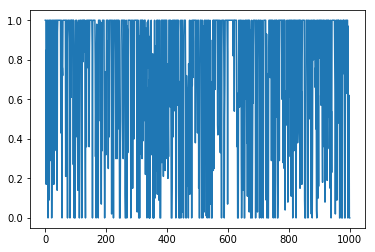

In [0]:
def get_dataset(data_size=100000):
  X=[]
  Y=[]
  for file in os.listdir('./data'):
      #print(i)
      try:
          f = open(os.path.join("./data",file))

      except Exception:
          print("whether the file does not exist or there is a problem with png function !")
          break
      game = 1
      game_number =0
      while game!= None:
          try:
            game = chess.pgn.read_game(f)
            game_number+=1
          except Exception:
            break

          who_wins = {'0-1':-1,'1-0':1,'1/2-1/2':0}[game.headers['Result']]
          print('parsing game #',game_number,' number of exemple parsed',len(X))
          state = State(game.board())
          for i,move in enumerate(game.main_line()):
              
              state.board.push(move)
              X.append(state.serialize()[0,:,:])
              Y.append(who_wins)
              #print(' '*25+str(i),who_wins)
              #print(board)
              if len(X)>data_size:
                return X,Y
            
      return X,Y
   
              
              
              
              
          
torch.set_default_tensor_type('torch.DoubleTensor')
X,Y = get_dataset()
X = np.reshape(np.array(X,dtype=float),(-1,1,8,8))
Y = np.array(Y)

datachess = chessData(X,Y)
model = NetModel()
optimizer = optim.Adam(model.parameters())
Batch = DataLoader(dataset=datachess,batch_size=100)
criterion = nn.MSELoss()
device = torch.device('cuda:0'if torch.cuda.is_available() else 'cpu')
def train_net(model,batch,criterion,optimizer,device='cpu',epoch=1):
  LOSS=[]
  for _ in range(epoch):
    for x,y in Batch:
      
      model = model.to(device)
      x,y = x.to(device),y.to(device)
      optimizer.zero_grad()
      #print(x.shape)
      yhat = model(x)
      #print(yhat)
      #print(yhat.shape)
      #print(y.shape)
      
      loss = criterion(yhat,y.double())
      LOSS.append(loss)
      loss.backward()
      optimizer.step()
  return LOSS
      
      
l = train_net(model,Batch,criterion,optimizer,device)
print(l[0:20])
import matplotlib.pyplot as plt
# somthing wrong !!!
plt.plot(l)

In [0]:
#!cat /proc/cpuinfo
import torch
print(torch.__version__)

1.0.1.post2
